# Decomposition into frames and manual determination of eye-lateral distance

## Decomposition of the recording; conversion of each frame to Grayscale 2D array

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Raw Frames Capture
One time run only

In [2]:
import cv2, os

video_path = "RAW_01.mov"
output_directory = "Cap_Frames_01"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

video_capture = cv2.VideoCapture(video_path)

frame_count = 0

while True:
    success, frame = video_capture.read()
    if not success:
        break

    output_path = os.path.join(output_directory, f"frame_{frame_count}.jpg")
    cv2.imwrite(output_path, frame)
    frame_count += 1

video_capture.release()
print(f"Total frames extracted: {frame_count}")


KeyboardInterrupt: 

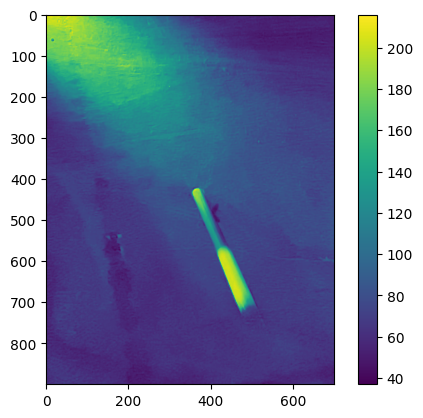

In [14]:
from PIL import ImageFilter
img = Image.open('Cap_Frames_01/frame_280.jpg').convert("L")
cpr = img.crop(
    (200, 500, 900, 1400)
)

ftd = cpr.filter(ImageFilter.GaussianBlur(radius=0))
plt.imshow(ftd)
plt.colorbar()
#cpr.save('frame_2_filtered.jpg')

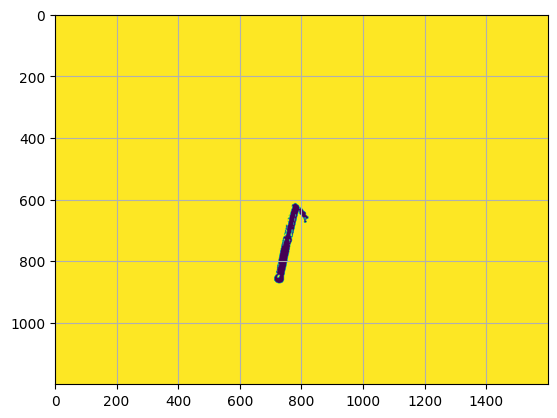

In [134]:
import cv2
import numpy as np

# Load the image using OpenCV
image = cv2.imread("Captured_Frames/frame_35.jpg", 0)

lower_threshold = 0
upper_threshold = 120

binary_image = np.where((image >= lower_threshold) & (image <= upper_threshold), 0, 255).astype(np.uint8)

plt.imshow(binary_image)
plt.grid(True)

[[165 165 165 ... 125 125 125]
 [165 165 165 ... 125 125 125]
 [165 165 165 ... 125 125 125]
 ...
 [185 185 185 ... 145 145 145]
 [185 185 185 ... 145 145 145]
 [185 185 185 ... 145 145 145]]


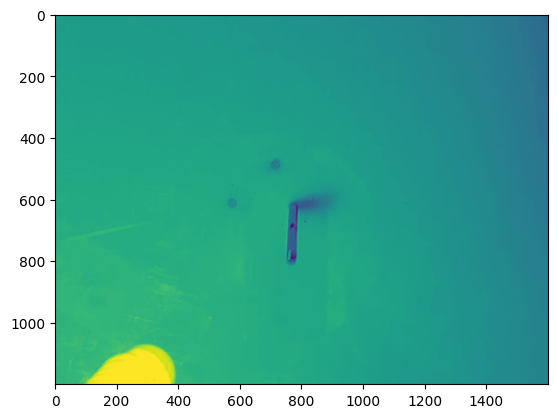

In [83]:
print(image)
plt.imshow(image)

In [81]:
type(Image.open('frame_3.jpg'))

PIL.JpegImagePlugin.JpegImageFile

In [129]:
import pandas
np.set_printoptions(threshold=0)
array = open('dst.txt', 'a')
array.write(pandas.DataFrame(image).to_string(header=False, index=False))
array.close()


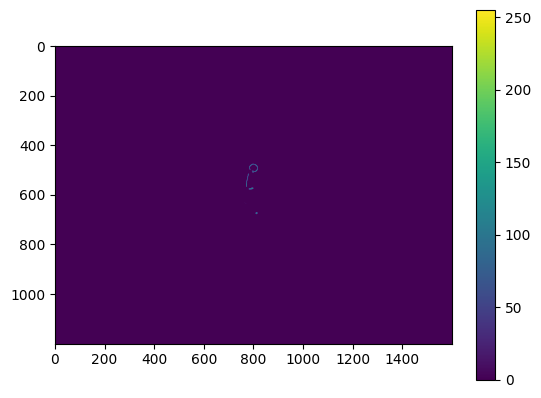

In [148]:
import cv2 as cv
src = cv.imread(cv.samples.findFile('Captured_Frames/frame_700.jpg'), cv.IMREAD_GRAYSCALE)

dst = cv.Canny(src, 100, 200, None, 3)
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

 # Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(dst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

plt.imshow(dst)
plt.colorbar()


146.4547711752676


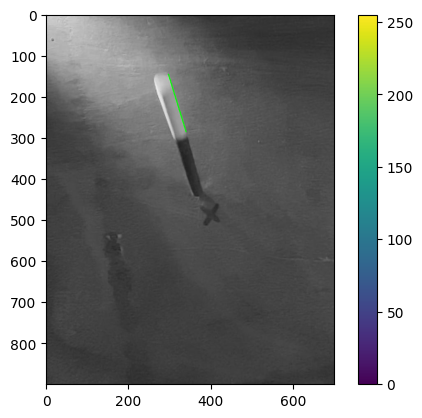

In [109]:
import cv2
import numpy as np
from math import sqrt

from PIL import ImageFilter
img = Image.open('Cap_Frames_01/frame_400.jpg').convert("L")
cpr = img.crop(
    (200, 500, 900, 1400)
)

ftd = cpr.filter(ImageFilter.GaussianBlur(radius=0))

ftd.save('Chopped.jpg')
#image = cv2.imread(cpr)
image = cv2.imread('Chopped.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# edge detection using Canny
edges = cv2.Canny(gray_image, 0, 300)

#Hough line transform (Probabilistic)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=3, minLineLength=10, maxLineGap=50)

# Find the line with the highest y-coordinate value
highest_line = None
highest = 0
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if sqrt((x2-x1)**2 + (y2-y1)**2) > highest:
            highest_line = line
            highest = sqrt((x2-x1)**2 + (y2-y1)**2)
else:
    highest = 0


# Draw the highest line on the image
if highest_line is not None:
    x1, y1, x2, y2 = highest_line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with the highest line
plt.imshow(image)
plt.colorbar()
print(highest)

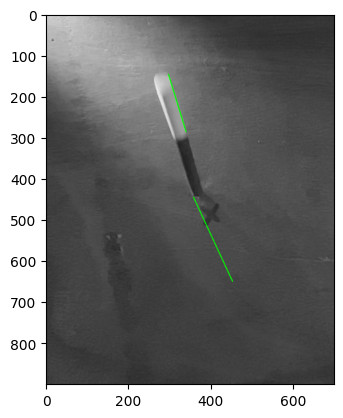

In [107]:
plt.imshow(image)

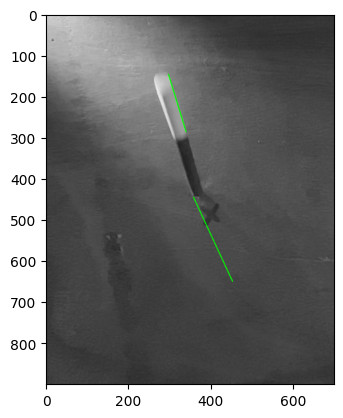

In [108]:
plt.imshow(image)

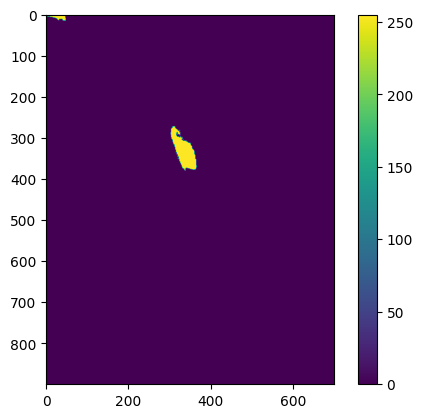

In [113]:
import cv2
import numpy as np

from PIL import ImageFilter
img = Image.open('Cap_Frames_01/frame_255.jpg')
cpr = img.crop(
    (200, 500, 900, 1400)
)

ftd = cpr.filter(ImageFilter.GaussianBlur(radius=0))

ftd.save('Chopped.jpg')
#image = cv2.imread(cpr)
image = cv2.imread('Chopped.jpg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

upper_color = np.array([179, 255, 255])
lower_color = np.array([28, 6, 122])

mask = cv2.inRange(hsv, lower_color, upper_color)

# Step 5: Apply the mask to extract the region of interest
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Show the segmented image
fig = plt.figure()
fig.add_subplot()
plt.imshow(mask)
plt.colorbar()

98.73702446397704


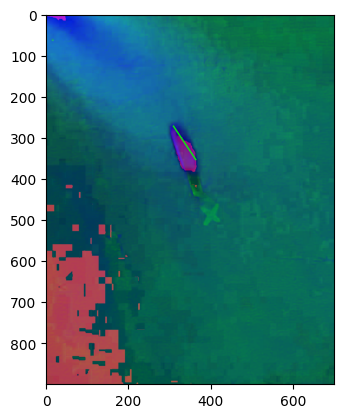

In [114]:
edges = cv2.Canny(mask, 0, 300)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=3, minLineLength=10, maxLineGap=50)

highest_line = None
highest = 0
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if sqrt((x2-x1)**2 + (y2-y1)**2) > highest:
            highest_line = line
            highest = sqrt((x2-x1)**2 + (y2-y1)**2)
else:
    highest = 0


# Draw the highest line on the image
if highest_line is not None:
    x1, y1, x2, y2 = highest_line[0]
    cv2.line(hsv, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(hsv)
print(highest)


## Track!

### Function to track

In [150]:
import cv2
import numpy as np

from PIL import ImageFilter

def track(frame_number):    
    img = Image.open('Cap_Frames_01/frame_' + str(frame_number) + '.jpg')
    cpr = img.crop(
        (200, 500, 900, 1400)
    )

    ftd = cpr.filter(ImageFilter.GaussianBlur(radius=0))

    ftd.save('Chopped.jpg')
    #image = cv2.imread(cpr)
    image = cv2.imread('Chopped.jpg')

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    upper_color = np.array([179, 255, 255])
    lower_color = np.array([28, 6, 122])

    mask = cv2.inRange(hsv, lower_color, upper_color)

    edges = cv2.Canny(mask, 0, 300)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=3, minLineLength=10, maxLineGap=50)

    highest_line = None
    highest = 0
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if sqrt((x2-x1)**2 + (y2-y1)**2) > highest:
                highest_line = line
                highest = sqrt((x2-x1)**2 + (y2-y1)**2)
    else:
        highest = 0

    if highest_line is not None:
        x1, y1, x2, y2 = highest_line[0]
        cv2.line(hsv, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return sqrt((330 - x2)**2 + (420 - y2)**2)

In [151]:
x = np.array([])
for i in range(156, 630):
    x = np.append(x, track(i))

In [152]:
print(x)

[267.52943763 330.10301422 252.76471273 246.47312227 412.81593961
 215.60380331 285.81987335 171.46719803 178.4432683  180.6765065
 131.5218613   95.8018789  504.32132614  64.63745044  53.03772242
 109.772492   119.43617542 154.02921801 179.22611417 194.65867564
 206.15528128 231.24878378 261.96182928 239.52661648 245.69289774
 251.75384803 253.77943179 261.84155514 246.90889008 295.67042463
 255.4310083  240.84227204 250.1539526  227.71253808 197.30686759
 179.44637082 173.01156031 139.26234236 129.65338407 110.02272493
  61.07372594  36.76955262 497.197144    89.87213139 124.32618389
 235.45912596 289.67913283 174.73408368 255.97851472 207.27276715
 179.73869923 438.32636243 255.36052945 464.2165443  266.55768606
 271.11805547 276.06158733 277.01624501 439.38252127 275.07271766
 260.82369524 260.82369524 296.06755986 428.56504757 225.1777076
 200.83077453 222.7195546  164.24676557 260.71440313 194.80503074
 156.84705926  93.08598176 504.50173439  46.61544808  91.21951546
 115.9525765

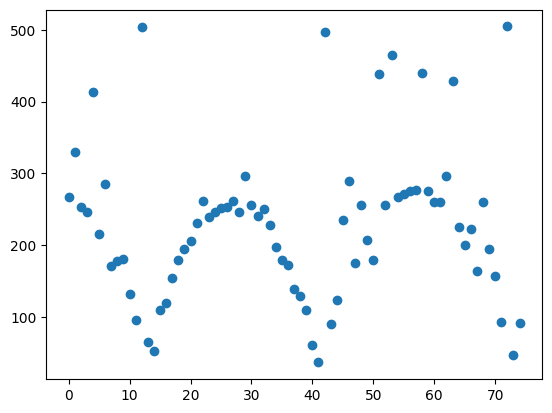

In [165]:
plt.scatter(range(0, 75), x[:75])


In [166]:
data_01 = np.array([])
k = x

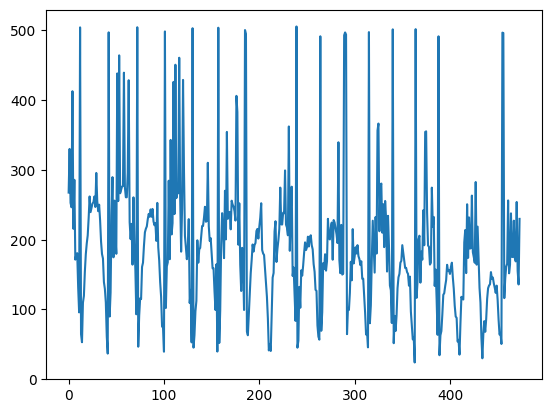

In [167]:
for i in range(0, len(k)):
    k[i] = k[i]
plt.plot(k)

In [169]:
from math import asin
data_01 = np.array([])
for i in range(0, len(k)):
    data_01 = np.append(data_01, asin(k[i]/540))
print(len(data_01), data_01)

474 [0.51832389 0.65770458 0.48711998 0.47398065 0.87022494 0.41071646
 0.55777066 0.32312549 0.33678085 0.34116601 0.24603368 0.17835498
 1.20524936 0.11998668 0.09837661 0.20470915 0.22302233 0.28925608
 0.33831726 0.3687814  0.39170955 0.44254258 0.5064941  0.45957563
 0.47235744 0.48500279 0.48924763 0.50623941 0.47488782 0.57941896
 0.4927158  0.46229593 0.48165674 0.43530821 0.37404431 0.33874969
 0.32614304 0.26084103 0.24246769 0.20518245 0.11334201 0.06814449
 1.16996118 0.16720793 0.2323178  0.45118851 0.56621647 0.32951233
 0.49386694 0.3939496  0.33932371 0.94708336 0.49256766 1.03460429
 0.51625347 0.52599121 0.53660971 0.53866797 0.95043995 0.53448034
 0.50408545 0.50408545 0.5802981  0.91676721 0.43013747 0.38106452
 0.42513484 0.30905724 0.50385432 0.36907198 0.29470493 0.1732468
 1.20618512 0.08643248 0.16973892 0.21641229 0.21448285 0.30275198
 0.31455974 0.3621545  0.40050094 0.41085228 0.41762816 0.43884933
 0.45440955 0.44588762 0.46757981 0.44588762 0.46901874 0.4

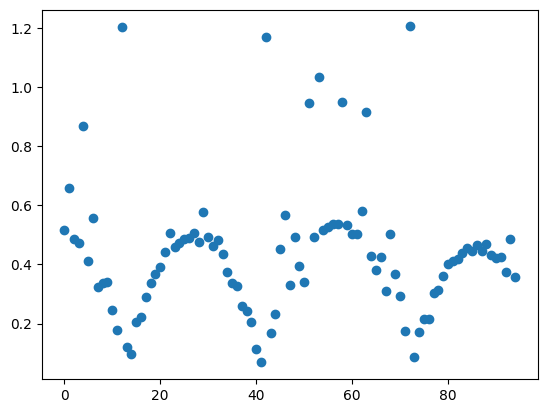

In [179]:
plt.scatter(range(0, 95), data_01[:95])